In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [11]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.1404 - accuracy: 4.4000e-04 - val_loss: 0.1404 - val_accuracy: 8.0000e-04
Epoch 2/50
50000/50000 [==============================] - 12s 237us/step - loss: 0.1404 - accuracy: 0.0015 - val_loss: 0.1404 - val_accuracy: 0.0022
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.1404 - accuracy: 0.0026 - val_loss: 0.1404 - val_accuracy: 0.0027
Epoch 4/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.1404 - accuracy: 0.0028 - val_loss: 0.1404 - val_accuracy: 0.0027
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.1404 - accuracy: 0.0029 - val_loss: 0.1403 - val_accuracy: 0.0027
Epoch 6/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.1404 - accuracy: 0.0029 - val_loss: 0.1403 - val_accuracy: 0.0027
Epoch 7/50
50000/50000 [============================

In [17]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [18]:
encoded_test_data.shape

(10000, 32)

In [19]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [21]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RSADM.csv', index = False)

In [25]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : truck


In [26]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 5


In [27]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [28]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [29]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
38,9,truck,1.951150,0.394481,2.952944,0.065717,1.766907,0.0,0.000000,0.0,...,2.527892,0.0,0.0,0.452569,2.745191,0.0,3.100175,0.060734,1.000000,1.192093e-07
4233,9,truck,1.675167,0.375730,2.375069,0.033235,1.377262,0.0,0.011944,0.0,...,2.053916,0.0,0.0,0.386959,2.179469,0.0,2.426366,0.039958,0.999688,3.116131e-04
4821,4,deer,1.906944,0.422456,2.909292,0.028318,1.730489,0.0,0.000000,0.0,...,2.403300,0.0,0.0,0.472559,2.695241,0.0,2.951924,0.000000,0.999652,3.480315e-04
6355,0,airplane,2.149742,0.434716,3.263461,0.046896,2.038952,0.0,0.017219,0.0,...,2.839746,0.0,0.0,0.494749,2.912821,0.0,3.481771,0.161358,0.999593,4.071593e-04
4406,5,dog,2.063992,0.447100,3.002681,0.008759,1.800852,0.0,0.000000,0.0,...,2.633141,0.0,0.0,0.461513,2.707824,0.0,3.182075,0.028066,0.999581,4.186034e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,3,cat,0.000000,0.000000,0.653116,0.239758,0.000000,0.0,0.005204,0.0,...,0.000000,0.0,0.0,0.000000,0.336102,0.0,0.000000,0.000000,0.504291,4.957089e-01
8462,2,bird,0.000000,0.000000,0.787602,0.119867,0.000000,0.0,0.119275,0.0,...,0.000000,0.0,0.0,0.000000,0.552236,0.0,0.000000,0.000000,0.503101,4.968989e-01
5290,3,cat,0.000000,0.000000,0.645334,0.218846,0.000000,0.0,0.047019,0.0,...,0.000000,0.0,0.0,0.000000,0.287197,0.0,0.000000,0.000000,0.503083,4.969171e-01
9909,1,automobile,0.000000,0.000000,0.479055,0.234983,0.000000,0.0,0.237757,0.0,...,0.000000,0.0,0.0,0.000000,0.424710,0.0,0.000000,0.000000,0.502402,4.975979e-01


In [30]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

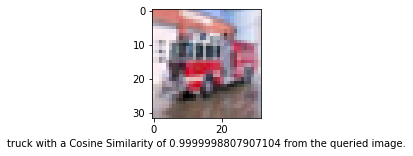

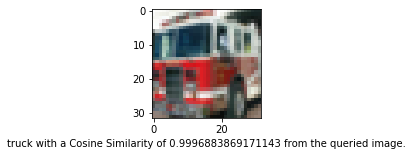

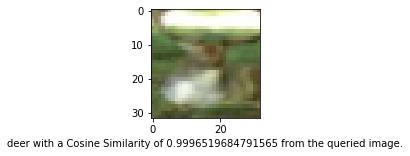

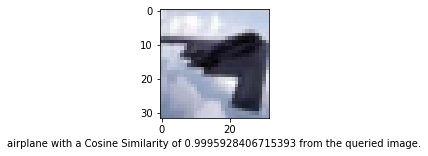

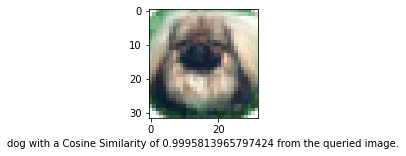

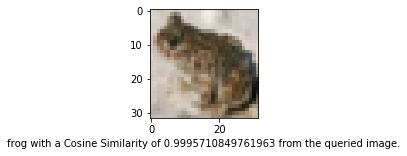

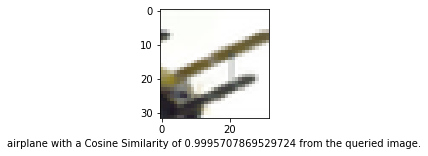

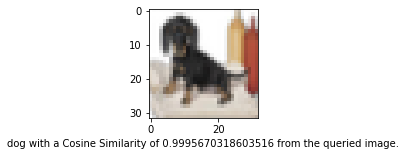

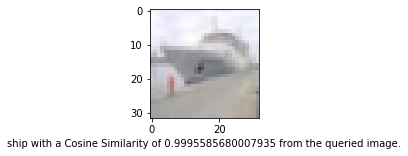

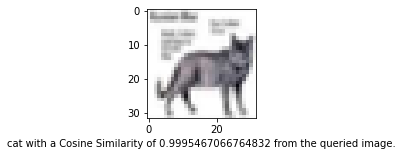

In [31]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [32]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [33]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
38,9,truck,1.951150,0.394481,2.952944,0.065717,1.766907,0.0,0.000000,0.0,...,0.0,0.0,0.452569,2.745191,0.0,3.100175,0.060734,1.000000,1.192093e-07,0.000000
3435,6,frog,1.983245,0.363624,2.984898,0.069950,1.675350,0.0,0.056262,0.0,...,0.0,0.0,0.441270,2.798865,0.0,3.015285,0.079450,0.999571,4.289150e-04,0.260918
8405,0,airplane,2.008316,0.393173,2.901306,0.000000,1.699617,0.0,0.098652,0.0,...,0.0,0.0,0.364768,2.831624,0.0,3.104249,0.025207,0.999471,5.286932e-04,0.264811
4821,4,deer,1.906944,0.422456,2.909292,0.028318,1.730489,0.0,0.000000,0.0,...,0.0,0.0,0.472559,2.695241,0.0,2.951924,0.000000,0.999652,3.480315e-04,0.296607
4406,5,dog,2.063992,0.447100,3.002681,0.008759,1.800852,0.0,0.000000,0.0,...,0.0,0.0,0.461513,2.707824,0.0,3.182075,0.028066,0.999581,4.186034e-04,0.305535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,9,truck,5.098708,1.405971,5.374788,0.000000,4.229760,0.0,0.081834,0.0,...,0.0,0.0,1.923431,3.843076,0.0,6.780813,0.000000,0.983543,1.645750e-02,9.274010
1153,8,ship,5.026165,1.443039,5.424857,0.000000,4.298205,0.0,0.016743,0.0,...,0.0,0.0,2.132298,3.858448,0.0,6.774678,0.028653,0.982899,1.710135e-02,9.307121
7546,7,horse,5.173052,1.409462,5.396217,0.024993,4.165577,0.0,0.000000,0.0,...,0.0,0.0,1.994659,4.000679,0.0,6.839741,0.000000,0.983881,1.611948e-02,9.351493
8470,8,ship,5.113339,1.422034,5.389990,0.000000,4.214489,0.0,0.038810,0.0,...,0.0,0.0,1.965728,3.864364,0.0,6.801267,0.047965,0.983404,1.659608e-02,9.375271


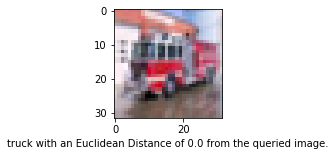

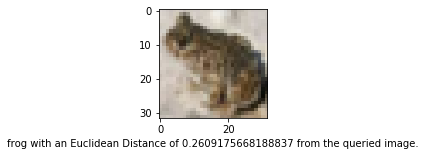

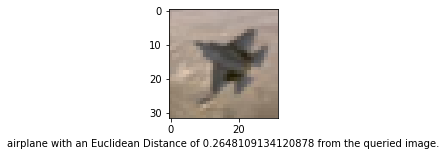

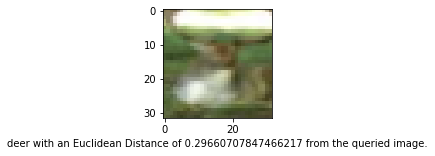

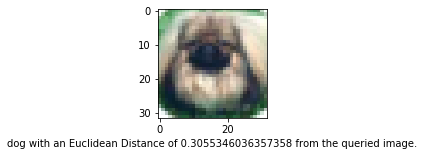

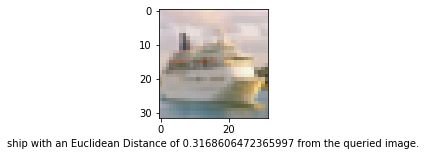

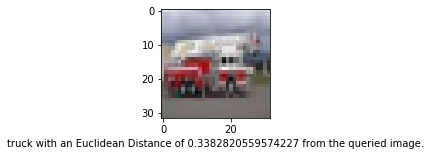

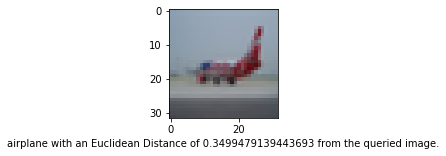

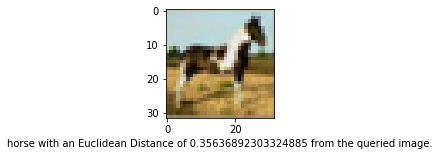

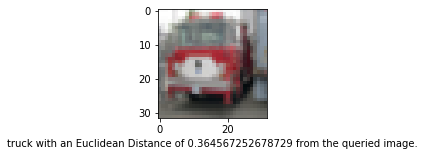

In [34]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()